### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
import os
print("Current Working Directory " , os.getcwd())

Current Working Directory  C:\Users\Dell


### Setting (CWD) Current Working Directory

In [4]:
#Setting current working directory
os.chdir("/Users/Zahed/Titanic Project")

### Reading Dataset

In [74]:
#importing Dataset
df=pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Checking Missing Values

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see there are lot of Missing data in age & Cabin column


<AxesSubplot:>

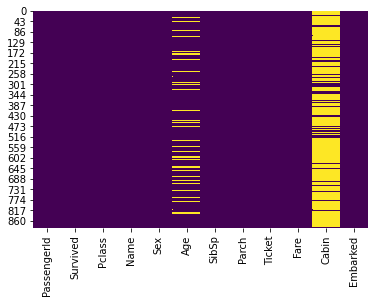

In [7]:
sn.heatmap(df.isnull(),cbar=False,cmap='viridis')

Visualisation of Missing data

<AxesSubplot:xlabel='Survived', ylabel='count'>

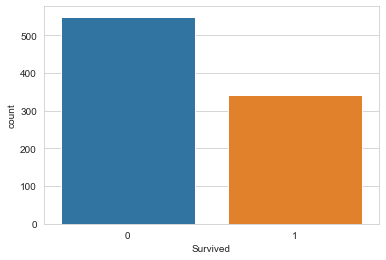

In [8]:
sn.set_style('whitegrid')
sn.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

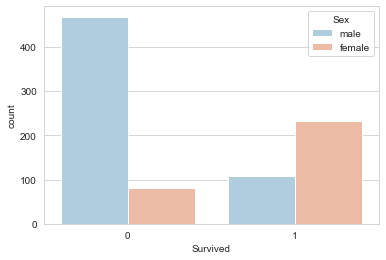

In [9]:
sn.set_style('whitegrid')
sn.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

Number of Survivors are seen more in female than male

<AxesSubplot:xlabel='Survived', ylabel='count'>

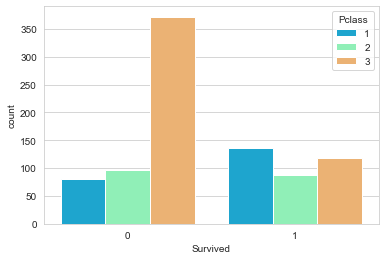

In [10]:
sn.set_style('whitegrid')
sn.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

class 1 have more survivors among other class passengers

<AxesSubplot:xlabel='Age'>

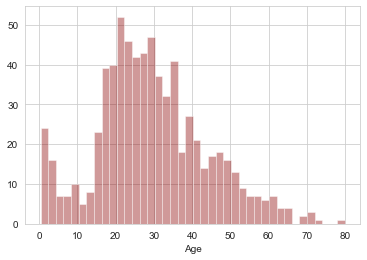

In [14]:
sn.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

The average passengers are seen between 20-50 Years

<AxesSubplot:xlabel='SibSp', ylabel='count'>

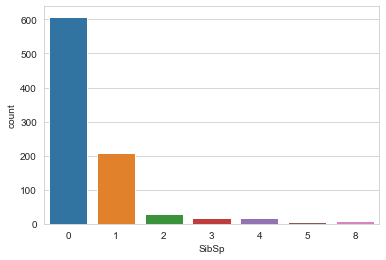

In [16]:
sn.countplot(x='SibSp',data=df)

In [ ]:
From the above plot we can say that most of the passengers were traveling alone very less had any siblings

### Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

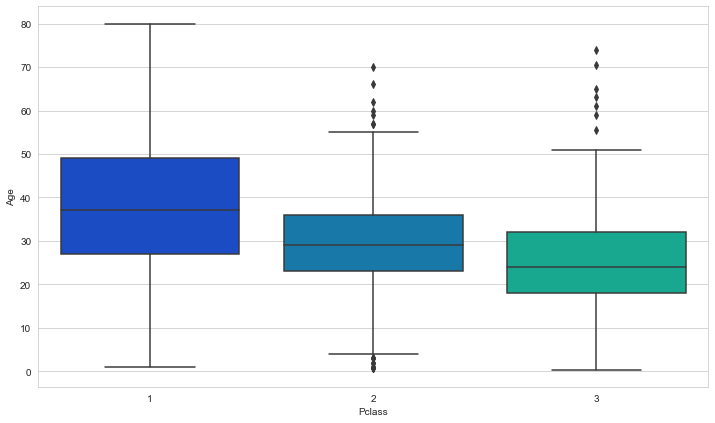

In [18]:
plt.figure(figsize=(12,7))
sn.boxplot(x='Pclass',y='Age',data=df,palette='winter')

From the above plot we can say that the average of the 3 Classes are approximately 37,29,24

In [75]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
    else:
        return Age

In [76]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

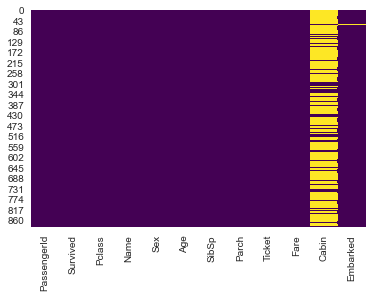

In [23]:
sn.heatmap(df.isnull(),cbar=False,cmap='viridis')

From above plot we can see we have resolved missing values from age column

In [77]:
df.drop('Cabin',axis=1,inplace=True)

We drop the columns cabin as more than 60% of the data is missing in it.

In [78]:
df.dropna(inplace=True)

Dropping the 2 rows of the Embarked column

<AxesSubplot:>

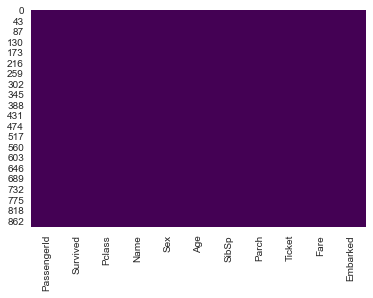

In [79]:
sn.heatmap(df.isnull(),cbar=False,cmap='viridis')

From the above plot we can see there are no missing value in the Dataset

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


### Converting the Categorical columns

In [80]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [81]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

Dropping the not needed columns as the data is not relevant

In [82]:
df = pd.concat([df,sex,embark],axis=1)

In [83]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Building a Logistic Regression Model

#### Train Test Split

In [102]:
X = df.drop('Survived',axis=1)

In [103]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,0,1
887,888,1,19.0,0,0,30.0000,0,0,1
888,889,3,24.0,1,2,23.4500,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0


In [104]:
y = df['Survived']

In [105]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

### Training & predicting

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
predictions = logmodel.predict(x_test)

In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
accuracy = confusion_matrix(y_test,predictions)

In [113]:
accuracy

array([[145,  22],
       [ 30,  70]], dtype=int64)

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
accuracy = accuracy_score(y_test,predictions)

In [116]:
accuracy

0.8052434456928839

In [117]:
predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [118]:
#Classify Function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X,y):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state =42)
    #Train the Model
    model.fit(x_train,y_train)
    print("Accuracy:",model.score(x_test, y_test)*100)
    
    # Cross-validation
    score = cross_val_score(model, X,y, cv=5)
    print("CV Score:",np.mean(score)*100)

In [120]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
classify(model1,X,y)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Accuracy: 79.82062780269058
CV Score: 77.16815844601028


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [128]:
round((79.82-77.16),2)

2.66

In [121]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
classify(model2,X,y)

Accuracy: 76.23318385650224
CV Score: 73.80308512664253


In [129]:
round((76.23-73.80),2)

2.43

In [123]:
from sklearn.ensemble import ExtraTreesClassifier
model4 = ExtraTreesClassifier()
classify(model4,X,y)

Accuracy: 79.82062780269058
CV Score: 80.99473116231829


In [131]:
round((80.99-79.82),2)

1.17

In [124]:
import lightgbm
model6 = lightgbm.LGBMClassifier()
classify(model6,X,y)

Accuracy: 81.61434977578476
CV Score: 80.20630990922365


In [132]:
round((81.61-80.20),2)

1.41

In [122]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
classify(model3,X,y)

Accuracy: 81.16591928251121
CV Score: 80.20630990922363


In [130]:
round((81.16-80.20),2)

0.96

In [ ]:
Since the differnece between the cross validation and accuracy are ver minimum in RandomForestClassifier 
we are considering RandomForestClassifier as the final Model and predicting values

### Saving the Final Model

In [133]:
#Using model5 which is xgboost which is the most accurate model after subtracting from cross value score (84.84% Accurate)
import pickle
  
# Save the trained model as a pickle string.
FinalModel = pickle.dumps(model3)
  
# Load the pickled model
Final_mod_from_pickle = pickle.loads(FinalModel)
  
# Use the loaded pickled model to make predictions
Final_mod_from_pickle.predict(X)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,